## 05 衡量回归算法的标准，MSE vs MAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
x = boston.data[:,5] # 只使用房间数量这个特征

In [7]:
x.shape

(506,)

In [8]:
y = boston.target

In [9]:
y.shape

(506,)

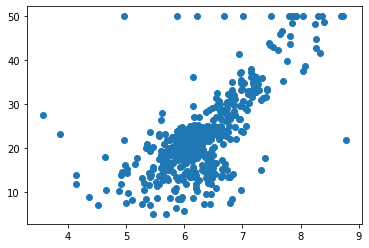

In [10]:
# 图像上50处有一条奇怪的直线，这个很有可能是数据的上限点
# 收集数据的时候很可能因为设置的上限而出现数据的上限点
plt.scatter(x, y)
plt.show()

In [11]:
np.max(y)

50.0

In [12]:
# 这些最大值的点可能无法代表真正的数据
x = x[y < 50.0]
y = y[y < 50.0]

In [13]:
x.shape

(490,)

In [14]:
y.shape

(490,)

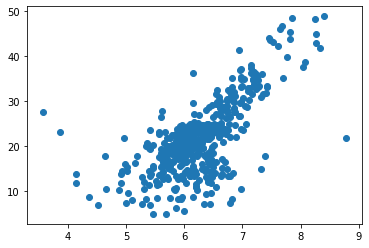

In [15]:
plt.scatter(x, y)
plt.show()

### 使用简单线性回归法

In [16]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [17]:
x_train.shape

(392,)

In [18]:
y_train.shape

(392,)

In [19]:
x_test.shape

(98,)

In [20]:
y_test.shape

(98,)

In [21]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [22]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [23]:
reg.a_

7.8608543562689555

In [24]:
reg.b_

-27.459342806705543

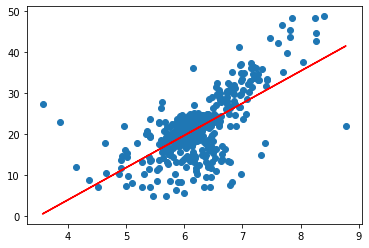

In [25]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

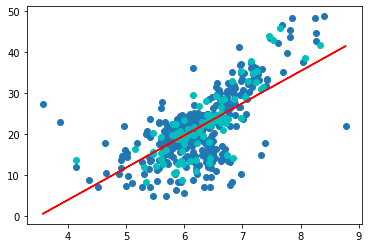

In [26]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [27]:
y_predict = reg.predict(x_test)

### MSE

In [28]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

### RMSE

In [29]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test
# 平均差距4.91万美元

4.914936635846635

### MAE

In [30]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test
# 平均误差3.54万美元

3.5430974409463873

### 封装我们自己的评测函数

代码参见 [这里](playML/metrics.py)

In [31]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [32]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [33]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [34]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### scikit-learn中的MSE和MAE

In [35]:
# sklearn中没有RMSE，加载MSE之后开方即可
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
print(mean_squared_error(y_test, y_predict))
print(sqrt(mean_squared_error(y_test, y_predict)))

24.156602134387438
4.914936635846635


In [37]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### MSE v.s. MAE
MSE有放大误差较大的项的趋势